# CS155: Miniproject 1
Kavya Sreedhar, Audrey Wang, Anne Zhou

In [1]:
import numpy as np 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
# Define function for loading files
def load_data(filename, skiprows=1):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=skiprows, delimiter=' ')

In [3]:
# Load data.
train = load_data('training_data.txt')
X_test = load_data('test_data.txt')

X_train = train[:, 1:]
y_train = train[:, 0]
N_train = len(X_train)
N_test = len(X_test)

In [4]:
# Normalize data.
max_vals = X_train.max(axis=0)
X_train = X_train / max_vals
X_test = X_test / max_vals
# X_train = np.log(X_train + 1)
# X_test = np.log(X_train + 1)

In [10]:
# Find cross-validation score of different models to determine best one.
inds = np.random.choice(len(y_train), 4000)
X_val = X_train[inds]
y_val = y_train[inds]
types = ['svm', 'logistic regression', 'random forest', 'gradient boost']
scores = []

sv = svm.SVC()
log = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boost = GradientBoostingClassifier()
scores.append(cross_val_score(sv, X_val, y_val))
scores.append(cross_val_score(log, X_val, y_val))
scores.append(cross_val_score(random_forest, X_val, y_val))
scores.append(cross_val_score(gradient_boost, X_val, y_val))

for i in range(len(types)):
    print('%s: %f' % (types[i], np.mean(scores[i])))
    print(scores[i])
    print()

svm: 0.503500
[0.50374813 0.50337584 0.50337584]

logistic regression: 0.822004
[0.80584708 0.83795949 0.82220555]

random forest: 0.779498
[0.78710645 0.78844711 0.76294074]

gradient boost: 0.794750
[0.79610195 0.80795199 0.78019505]



only balanced: 0.847200
[0.84970751 0.84550772 0.84638464]


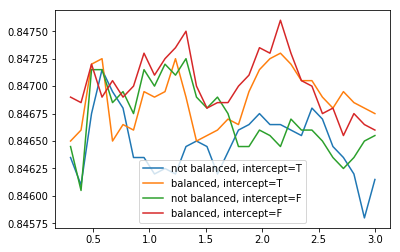

In [43]:
# Tweak parameters for best classifiers.
solver = 'liblinear' # ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
tol = 1e-4
c_arr = np.linspace(0.3, 3, 30)
log1 = LogisticRegression(class_weight='balanced', fit_intercept=fit_int, solver=solver, tol=tol)
score1 = cross_val_score(log1, X_train, y_train)
print('only balanced: %f' % np.mean(score1))
print(score1)

scores = np.zeros((len(c_arr), 4))
for j in [0, 1]:
    fit_int = True
    if j == 1:
        fit_int = False
    
    for i in range(len(c_arr)):
        #print(c_arr[i])
        log2 = LogisticRegression(C=c_arr[i], fit_intercept=fit_int, solver=solver, tol=tol)
        score2 = cross_val_score(log2, X_train, y_train)
        #print('only c: %f' % np.mean(score2))
        #print(score2)
        log4 = LogisticRegression(C=c_arr[i], class_weight='balanced', fit_intercept=fit_int, solver=solver, tol=tol)
        score4 = cross_val_score(log4, X_train, y_train)
        #print('both c and balanced: %f' % np.mean(score4))
        #print(score4)
        #print()
        scores[i,0+2*j] = score2.mean()
        scores[i,1+2*j] = score4.mean()

plt.plot(c_arr, scores[:,0], label='not balanced, intercept=T')
plt.plot(c_arr, scores[:,1], label='balanced, intercept=T')
plt.plot(c_arr, scores[:,2], label='not balanced, intercept=F')
plt.plot(c_arr, scores[:,3], label='balanced, intercept=F')
plt.legend()
plt.show()

In [54]:
inds = np.random.choice(len(y_train), 5000)
mask = np.ones(y_train.shape,dtype=bool)
mask[inds] = False

X_tra = X_train[mask]
y_tra = y_train[mask]
X_val = X_train[~mask]
y_val = y_train[~mask]
max_features = ['auto']
max_depth = [1, 5, 10, 25, 50, 100, None]
min_samples_split = [2, 5, 10, 25, 50, 100]
n_estimators = [10]

for i in range(len(max_features)):
    for j in range(len(max_depth)):
        for k in range(len(min_samples_split)):
            for l in range(len(n_estimators)):
                clf = RandomForestClassifier(max_features=max_features[i], \
                                             max_depth=max_depth[j], \
                                             min_samples_split=min_samples_split[k], \
                                             n_estimators=n_estimators[l])
                clf.fit(X_tra, y_tra)
                print('%i %i %i %i: %f\n' % (i, j, k, l, np.mean(cross_val_score(clf, X_val, y_val))))

0 0 0 0: 0.775136

0 1 0 0: 0.766984

0 2 0 0: 0.770833



In [5]:
# Make predictions to output file.
clf = LogisticRegression(C=2.0, class_weight='balanced')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test).flatten()
f = open('predictions.txt', 'w')
f.write('Id,Prediction\n')
for i in range(len(predictions)):
    f.write('%d,%d\n' % ((i + 1), predictions[i]))
f.close()

In [ ]:
# import tensorflow as tf 
# import keras
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation, Flatten, Dropout
# from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization
# from keras import regularizers

In [ ]:
# N = 1000 # Number of parameters

# # Define the model.
# model = Sequential()
# model.add(Dense(1000, input_shape=(N,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(Dense(900))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(800))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(Dense(10))
# model.add(Dense(1))

# # Print number of params
# model.count_params()

# # Compile the model
# model.compile(optimizer='adam',
#               loss='mse',
#               metrics=['accuracy'])

# # Train the model for 1 epoch
# history = model.fit(X_train, y_train, epochs=1, batch_size=32)

# # Evaluate the model
# model.evaluate(x=X_train, y=y_train)